## Homework 3
### Part 1: Imbalanced Dataset

 In this homework, you will be working with an imbalanced Dataset. The dataset is Credit Card Fraud Detection dataset which was hosted on Kaggle. The aim is to detect fraudlent transactions.

### Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

## Name: Aaron Zhao

## uni: sz2940

### Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Feel free to import any other packages you'd like to

# The libraries I imported
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

### **Data Preprocessing and Exploration**
Download the Kaggle Credit Card Fraud data set. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [4]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### **1.1 Examining the class Imbalance**
**1.1.1 How many observations are in this dataset? How many are positive and negative?**
(Note: Positive labels are labeled as 1)

In [21]:
print('Number of Observations: {}'.format(raw_df.shape[0]))
print('Number of Positive Labels: {}'.format(raw_df[raw_df['Class'] == 1].shape[0]))
print('Number of Negative Labels: {}'.format(raw_df[raw_df['Class'] == 0].shape[0]))

Number of Observations: 284807
Number of Positive Labels: 492
Number of Negative Labels: 284315


#### **1.2 Cleaning and normalizing the data**
The raw data has a few issues. We are not sure what the time column actually means so drop the Time column. The Amount column also has a wide range of values covered so we take the log of the Amount column to reduce its range.

In [6]:
cleaned_df = raw_df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)

**1.2.1 Split the dataset into development and test sets. Please set test size as 0.2 and random state as 42. Print the shape of your development and test features**

In [7]:
df_y = cleaned_df[["Class"]]
cleaned_df.pop("Class")
df_X = cleaned_df

df_X_dev, df_X_test, df_y_dev, df_y_test = \
train_test_split(df_X , df_y, test_size = 0.2, random_state = 42, stratify = df_y)

print(f"Shape of development data: {df_X_dev.shape}")
print(f"Shape of test data: {df_X_test.shape}")

Shape of development data: (227845, 29)
Shape of test data: (56962, 29)


**1.2.2 Normalize the features using Standard Scaler from Sklearn.**

In [8]:
scaler = StandardScaler()
df_X_dev = scaler.fit_transform(df_X_dev)
df_X_test = scaler.transform(df_X_test)
print('Shape of development features {:}'.format(df_X_dev.shape))
print('Shape of test features {:}'.format(df_X_test.shape))

Shape of development features (227845, 29)
Shape of test features (56962, 29)


#### **1.3 Defining Model and Performance Metrics**

**1.3.1 First, let us fit a default Decision tree classifier. ( use max_depth=10 and random_state=42). Print the AUC and Average Precision values of 5 Fold Cross Validation**

In [22]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

scores = cross_validate(DecisionTreeClassifier(max_depth = 10, random_state = 42), \
                        df_X_dev, df_y_dev, cv = 5, scoring = ['roc_auc', 'average_precision'])
    
print('AUC score: {}'.format(scores['test_roc_auc']))
print('Average precision: {}'.format(scores['test_average_precision']))

AUC score: [0.88756328 0.88400873 0.81260522 0.77454358 0.82104149]
Average precision: [0.62653551 0.71014615 0.60399496 0.58692296 0.68112078]


**1.3.2 Perform random oversampling on the development dataset.**


*   What many positive and negative labels do you observe after random oversampling?
*   What is the shape of your development dataset?

(Note: Set random state as 42 when performing oversampling)


In [10]:
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

ros = RandomOverSampler(random_state = 42)
X_dev_oversample, y_dev_oversample = ros.fit_resample(df_X_dev, df_y_dev)

print(f"The shape of my development dataset is {X_dev_oversample.shape}")
print(f"I observed {y_dev_oversample['Class'].value_counts()[1]} \
positive labels and {y_dev_oversample['Class'].value_counts()[0]} negative labels")

The shape of my development dataset is (454902, 29)
I observed 227451 positive labels and 227451 negative labels


**1.3.3 Repeat 1.3.1 using the dataset you created in the above step(1.3.2 Random oversampling). (Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10 and random_state=42. This will help us to compare the models)**

In [23]:
# ros = RandomOverSampler(random_state = 42)
sample_pipe_ros = imb_make_pipeline(ros, DecisionTreeClassifier(max_depth = 10, random_state = 42))
scores = cross_validate(sample_pipe_ros, X_dev_oversample, y_dev_oversample, cv = 5,\
                        scoring = ['roc_auc', 'average_precision'])

print('AUC score: {}'.format(scores['test_roc_auc']))
print('Average precision: {}'.format(scores['test_average_precision']))


AUC score: [0.99886808 0.99929956 0.99900977 0.99926441 0.99932258]
Average precision: [0.99816396 0.99884446 0.99826911 0.9986672  0.99874564]


**1.3.4 Perform Random undersampling on the development dataset**. 
- What many positive and negative labels do you observe after random undersampling?
- What is the shape of your development dataset?
(Note: Set random state as 42 when performing undersampling)

In [12]:
rus = RandomUnderSampler(random_state = 42)
X_dev_undersample, y_dev_undersample = rus.fit_resample(df_X_dev, df_y_dev)

print(f"The shape of my development dataset is {X_dev_undersample.shape}")
print(f"I observed {y_dev_undersample['Class'].value_counts()[1]} \
positive labels and {y_dev_undersample['Class'].value_counts()[0]} negative labels")

The shape of my development dataset is (788, 29)
I observed 394 positive labels and 394 negative labels


**1.3.5 Repeat 1.3.1 using the dataset you created in the above step(1.3.4 Random undersampling). (Make sure you use the same hyperparameters as 1.3.1. i,e., max_depth=10 and random_state=42. This will help us to compare the models)**

In [24]:
# rus = RandomUnderSampler(random_state = 42)
sample_pipe_rus = imb_make_pipeline(rus, DecisionTreeClassifier(max_depth = 10, random_state = 42))
scores = cross_validate(sample_pipe_rus, X_dev_undersample, y_dev_undersample, cv = 5,\
                        scoring = ['roc_auc', 'average_precision'])

print('AUC score: {}'.format(scores['test_roc_auc']))
print('Average precision: {}'.format(scores['test_average_precision']))

AUC score: [0.93662875 0.94936709 0.9097901  0.92583577 0.92989289]
Average precision: [0.91336577 0.92661432 0.86678359 0.90629539 0.89830283]


**1.3.6 Perform Synthetic Minority Oversampling Technique(SMOTE) on the development dataset**
- What many positive and negative labels do you observe after performing SMOTE?
- What is the shape of your development dataset? (Note: Set random state as 42 when performing SMOTE)

In [14]:
smote = SMOTE(random_state = 42)
X_dev_smote, y_dev_smote = smote.fit_resample(df_X_dev, df_y_dev)

print(f"The shape of my development dataset is {X_dev_smote.shape}")
print(f"I observed {y_dev_smote['Class'].value_counts()[1]} \
positive labels and {y_dev_smote['Class'].value_counts()[0]} negative labels")

The shape of my development dataset is (454902, 29)
I observed 227451 positive labels and 227451 negative labels


**1.3.7 Repeat 1.3.1 using the dataset you created in the above step(1.3.6 SMOTE). (Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10 and random_state=42. This will help us to compare the models)**

In [25]:
smote = SMOTE(random_state = 42)
sample_pipe_smote = imb_make_pipeline(smote, DecisionTreeClassifier(max_depth = 10, random_state = 42))
scores = cross_validate(sample_pipe_smote, X_dev_smote, y_dev_smote, cv = 5,\
                        scoring = ['roc_auc', 'average_precision'])

print('AUC score: {}'.format(scores['test_roc_auc']))
print('Average precision: {}'.format(scores['test_average_precision']))

AUC score: [0.99757923 0.99738426 0.99772842 0.9972463  0.99714931]
Average precision: [0.99667622 0.99645425 0.99685462 0.99619248 0.99611009]


**1.3.8 Make predictions on the test set using the four models that you built and report their AUC values.**

In [16]:
# Decision Tree

dtr = DecisionTreeClassifier(max_depth = 10, random_state = 42)
dtr_pred = dtr.fit(df_X_dev, df_y_dev).predict_proba(df_X_test)[:,1]
dtr_score = roc_auc_score(df_y_test, dtr_pred)
print('Decision Tree AUC score: {}'.format(dtr_score))

# OverSampling

X_dev_oversample, y_dev_oversample = \
RandomOverSampler(random_state = 42).fit_resample(df_X_dev, df_y_dev)

ros_pred = dtr.fit(X_dev_oversample, y_dev_oversample).predict_proba(df_X_test)[:,1]
ros_score = roc_auc_score(df_y_test, ros_pred)
print('RandomOverSampler AOC score: {}'.format(ros_score))

# UnderSampling

X_dev_undersample, y_dev_undersample = \
RandomUnderSampler(random_state = 42).fit_resample(df_X_dev, df_y_dev)

rus_pred = dtr.fit(X_dev_undersample, y_dev_undersample).predict_proba(df_X_test)[:,1]
rus_score = roc_auc_score(df_y_test, rus_pred)
print('RandomUnderSampler AUC score: {}'.format(rus_score))

# SMOTE

X_dev_smote, y_dev_smote = SMOTE(random_state = 42).fit_resample(df_X_dev, df_y_dev)
smote_pred = dtr.fit(X_dev_smote, y_dev_smote).predict_proba(df_X_test)[:,1]
smote_score = roc_auc_score(df_y_test, smote_pred)
print('SMOTE AUC score: {}'.format(smote_score))

Decision Tree AUC score: 0.8196316775866227
RandomOverSampler AOC score: 0.9016732009348478
RandomUnderSampler AUC score: 0.8959979162599198
SMOTE AUC score: 0.8752678248423735


**1.3.9 Plot Confusion Matrices for all the four models on the test set. Comment your results**

Text(0.5, 1.0, 'Confustion matrix of smote Decision Tree Classifier model')

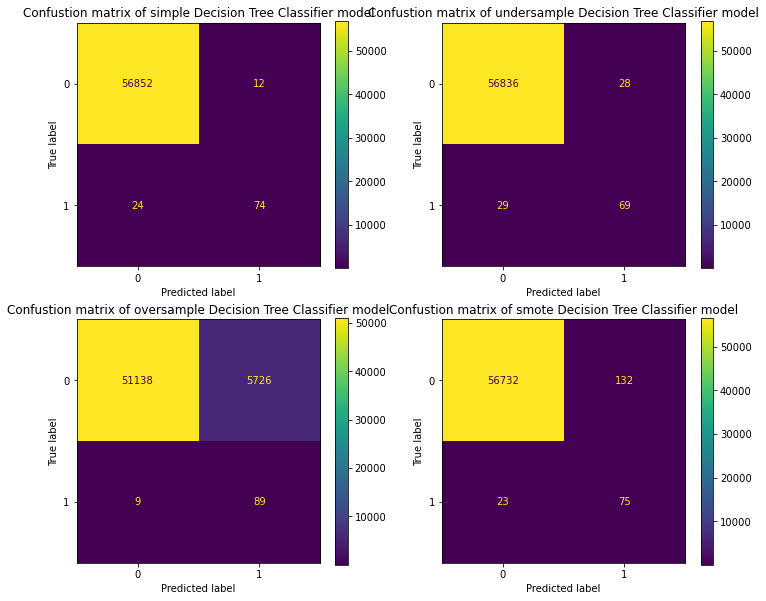

In [17]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,10))
ax = ax.flatten()

dt = DecisionTreeClassifier(max_depth = 10, random_state = 42)
dt.fit(df_X_dev, df_y_dev)
ConfusionMatrixDisplay.from_estimator(dt, df_X_test, df_y_test, ax = ax[0])
ax[0].set_title('Confustion matrix of simple Decision Tree Classifier model')

ros = RandomOverSampler(random_state = 42)
sample_pipe_ros = imb_make_pipeline(ros, DecisionTreeClassifier(random_state = 42))
sample_pipe_ros.fit(df_X_dev, df_y_dev)
ConfusionMatrixDisplay.from_estimator(sample_pipe_ros, df_X_test, df_y_test, ax = ax[1])
ax[2].set_title('Confustion matrix of oversample Decision Tree Classifier model')

rus = RandomUnderSampler(random_state = 42)
sample_pipe_rus = imb_make_pipeline(rus, DecisionTreeClassifier(random_state = 42))
sample_pipe_rus.fit(df_X_dev, df_y_dev)
ConfusionMatrixDisplay.from_estimator(sample_pipe_rus, df_X_test, df_y_test, ax = ax[2])
ax[1].set_title('Confustion matrix of undersample Decision Tree Classifier model')

smote = SMOTE(random_state = 42)
sample_pipe_smote = imb_make_pipeline(smote, DecisionTreeClassifier(random_state = 42))
sample_pipe_smote.fit(df_X_dev, df_y_dev)
ConfusionMatrixDisplay.from_estimator(sample_pipe_smote, df_X_test, df_y_test, ax = ax[3])
ax[3].set_title('Confustion matrix of smote Decision Tree Classifier model')

**1.3.10 Plot ROC for all the four models on the test set in a single plot. Make sure you label axes and legend properly. Comment your results**

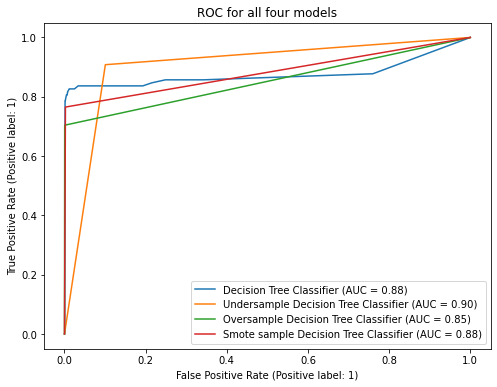

In [18]:
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots(figsize = (8,6))
RocCurveDisplay.from_estimator(dtr, df_X_test, df_y_test, name = 'Decision Tree Classifier', ax = ax)
RocCurveDisplay.from_estimator(sample_pipe_rus, df_X_test, df_y_test,\
                               name = 'Undersample Decision Tree Classifier', ax = ax)
RocCurveDisplay.from_estimator(sample_pipe_ros, df_X_test, df_y_test,\
                               name = 'Oversample Decision Tree Classifier',ax = ax)
RocCurveDisplay.from_estimator(sample_pipe_smote, df_X_test, df_y_test,\
                               name = 'Smote sample Decision Tree Classifier',ax = ax)
ax.set_title('ROC for all four models')
plt.show()

My decision Tree plot can be seen is a relatively 'curve' but all the other three are pretty much straight lines with only one turning point, which means my decision tree is seeking while predicting but the other three are sort of hitting some points first then to the final AUC. They are all more efficient than the original Decision Tree classifier, which is good and desired.

**1.3.11 Train a balanced default Decision tree classifier. (use max_depth=10 and random_state=42). ( balance the class weights). Print the AUC and average precision on test set**

In [19]:
dt_balanced = DecisionTreeClassifier(max_depth = 10, random_state = 42, class_weight='balanced')
dt_balanced_pred = dt_balanced.fit(df_X_dev, df_y_dev).predict_proba(df_X_test)[:,1]
dt_score_auc = roc_auc_score(df_y_test,dt_balanced_pred)
dt_score_aps = average_precision_score(df_y_test,dt_balanced_pred)

print('Balanced Decision Tree AUC score: {}'.format(dt_score_auc))
print('Balanced Decision Tree Average Precision score: {}'.format(dt_score_aps))

Balanced Decision Tree AUC score: 0.9017402244381152
Balanced Decision Tree Average Precision score: 0.4631083350370235


<!-- **1.3.12 Train a balanced Decision tree classifier. (You can use max_depth=10 and random_state=42)( balance the class weights). Print the AUC and average precision on test set** (Use Random state = 42) -->

**1.3.12 Plot confusion matrix on test set using the above model and comment on your results**

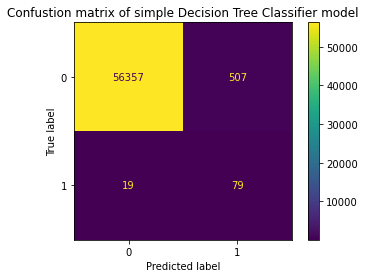

In [20]:
# plt.figure(figsize=(8, 8))
ConfusionMatrixDisplay.from_estimator(dt_balanced.fit(df_X_dev, df_y_dev), df_X_test, df_y_test)
plt.title('Confustion matrix of simple Decision Tree Classifier model')
plt.show()

Use balanced decision tree will return more fulse negative values which means this method is not desired. My decision tree becomes biased